In [1]:
#pip install keras
#pip install tensorflow
#pip install keras-models
#pip install yfinance
#pip install missingno
#pip install keras
#pip install tensorflow

In [2]:
import yfinance as yf
import pandas as pd
import missingno
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import regularizers
from tensorflow.keras.optimizers import Adam # Import Adam optimizer
from keras.metrics import sparse_categorical_crossentropy
from keras.callbacks import TensorBoard 
from keras.models import load_model
from tensorflow.keras.utils import plot_model 
from tensorflow.keras import activations
from sklearn.model_selection import train_test_split



In [3]:
def Download_Raw_Data(stock_name,start_time,end_time):
    spy = yf.download(stock_name, start=start_time, end=end_time)
    spy["Difference"] = spy["Adj Close"].pct_change()*100
    spy = spy.drop(spy.index[0])
    raw_results=spy['Difference'].to_numpy(dtype=np.float64)
    return raw_results

In [4]:
raw_results=Download_Raw_Data("SPY",'2010-01-01','2022-12-01')
print(raw_results)

[*********************100%***********************]  1 of 1 completed
[ 0.2647175   0.07038546  0.42211888 ... -1.59570541 -0.17175321
  3.15005828]


In [5]:
# Set the number of rows that we want to research
num_row =40

In [6]:
def Preprocessing_data(num_row,raw_results):
    results=raw_results
    print("number of rows of results = ",len(results))
    print("Data type = ",results.dtype)
    results_sign=np.sign(results)
    results_sign[results_sign<0]=0
    print("Number of the Results_sign: ",len(results_sign))
    return results,results_sign

In [7]:
results,results_sign = Preprocessing_data(num_row,raw_results)

number of rows of results =  3250
Data type =  float64
Number of the Results_sign:  3250


In [8]:
def create_2D_array(num_row,percentage_change):
    #Create an array to store the results
    data_array=np.zeros((1,num_row),dtype=np.float64)
    row=len(percentage_change)
    for i in range(num_row,row):   
        print([percentage_change[i-num_row:i]])
        data_array=np.concatenate((data_array, np.array([percentage_change[i-num_row:i]],dtype=np.float64)), axis=0)
    data_array=data_array[1:,:]
    return data_array

In [9]:
data_array=create_2D_array(num_row,results)


[array([ 0.2647175 ,  0.07038546,  0.42211888,  0.33278131,  0.13968424,
       -0.9326415 ,  0.84462626,  0.27046255, -1.12245304,  1.24956357,
       -1.01685962, -1.92287374, -2.229206  ,  0.51276433, -0.41905053,
        0.4757385 , -1.1472155 , -1.08687246,  1.5550331 ,  1.21036627,
       -0.498252  , -3.08659435,  0.20669464, -0.72195278,  1.2560256 ,
       -0.19585546,  1.04661232, -0.08321358,  1.57347202,  0.47388337,
        0.58951384,  0.20736277,  0.017995  , -1.21447012,  0.91978068,
       -0.135361  ,  0.0632588 ,  1.038485  ,  0.27705277,  0.08910751])]
[array([ 0.07038546,  0.42211888,  0.33278131,  0.13968424, -0.9326415 ,
        0.84462626,  0.27046255, -1.12245304,  1.24956357, -1.01685962,
       -1.92287374, -2.229206  ,  0.51276433, -0.41905053,  0.4757385 ,
       -1.1472155 , -1.08687246,  1.5550331 ,  1.21036627, -0.498252  ,
       -3.08659435,  0.20669464, -0.72195278,  1.2560256 , -0.19585546,
        1.04661232, -0.08321358,  1.57347202,  0.47388337,  

[array([-0.08509265,  2.02964008,  0.38955704, -0.56816834,  0.27872762,
        0.33351373,  1.52366569,  0.44339684, -0.33951395, -0.08183218,
        0.05456563,  0.00684076, -0.04183418, -0.15079039, -1.06420258,
       -0.56211179,  0.94215107, -0.46320886,  0.26396635,  0.10388194,
        0.40829735,  0.71680828,  0.00681831, -0.34212059, -0.98873607,
       -0.63800312,  0.05583167, -0.32784014,  0.83280087,  1.01335557,
        0.45347294, -0.25991473, -1.66645678,  0.01398108, -1.38766232,
       -0.28281032,  0.29069746, -0.05656853,  0.        ,  1.04706439])]
[array([ 2.02964008,  0.38955704, -0.56816834,  0.27872762,  0.33351373,
        1.52366569,  0.44339684, -0.33951395, -0.08183218,  0.05456563,
        0.00684076, -0.04183418, -0.15079039, -1.06420258, -0.56211179,
        0.94215107, -0.46320886,  0.26396635,  0.10388194,  0.40829735,
        0.71680828,  0.00681831, -0.34212059, -0.98873607, -0.63800312,
        0.05583167, -0.32784014,  0.83280087,  1.01335557,  

[array([-0.01112066, -0.43954669,  1.11772737,  0.254193  , -0.3583037 ,
       -1.12313313, -0.33012244, -0.0112218 ,  0.62320504, -0.31802768,
        1.70723471, -0.11555367,  0.58169905,  0.53422602,  0.2191257 ,
        0.50843945, -0.00545565, -0.01632867,  0.47330517, -0.95835673,
       -0.01641169, -0.28980692,  0.61418317,  0.02179911,  0.06536345,
        0.27228587, -1.3305054 ,  1.08979094,  0.53901146, -0.12998811,
       -0.42296971,  0.29404638,  0.06520747, -0.81934527, -2.1335794 ,
       -0.49194598,  0.59549348, -0.96054691,  1.0600631 , -0.58583335])]
[array([-0.43954669,  1.11772737,  0.254193  , -0.3583037 , -1.12313313,
       -0.33012244, -0.0112218 ,  0.62320504, -0.31802768,  1.70723471,
       -0.11555367,  0.58169905,  0.53422602,  0.2191257 ,  0.50843945,
       -0.00545565, -0.01632867,  0.47330517, -0.95835673, -0.01641169,
       -0.28980692,  0.61418317,  0.02179911,  0.06536345,  0.27228587,
       -1.3305054 ,  1.08979094,  0.53901146, -0.12998811, -

[array([ 0.67830463,  0.02867936,  0.4299355 , -0.19026534,  0.20493765,
        0.30435814, -0.29872432,  0.50885262,  0.1561264 ,  0.32597569,
       -0.13653516, -0.94774914, -0.77120917, -0.19666512, -0.13940172,
        0.29841986, -0.37241074,  0.64402402,  0.28384458, -0.163116  ,
        1.30226141, -3.59092955, -1.79098294,  1.80359801,  1.7027854 ,
        1.36455402,  0.21002501, -0.71930042,  0.59978617, -0.06201553,
        1.48903477,  0.35270921,  0.72632812, -0.01396091,  0.5583391 ,
       -0.13416149,  0.26872312, -0.10165765,  0.41630621, -0.37773397])]
[array([ 0.02867936,  0.4299355 , -0.19026534,  0.20493765,  0.30435814,
       -0.29872432,  0.50885262,  0.1561264 ,  0.32597569, -0.13653516,
       -0.94774914, -0.77120917, -0.19666512, -0.13940172,  0.29841986,
       -0.37241074,  0.64402402,  0.28384458, -0.163116  ,  1.30226141,
       -3.59092955, -1.79098294,  1.80359801,  1.7027854 ,  1.36455402,
        0.21002501, -0.71930042,  0.59978617, -0.06201553,  

[array([ 1.34964906,  1.27602135,  0.02930287, -0.6261212 , -0.49741745,
        0.12961319,  1.59394067,  1.16121367, -1.248653  , -1.01301026,
       -1.45407351,  0.51546101,  1.15582691,  0.25351262, -0.03664567,
        0.48389772,  1.74023711, -0.12549595, -0.6462767 , -0.51318708,
       -0.10895858,  0.10843079, -1.35303539,  0.17008986, -0.19193493,
       -2.49971369, -2.13145787,  2.73589743, -1.70114937, -0.29549698,
        1.27776468, -2.15845969,  1.28169743,  1.06992222,  0.78920365,
       -2.2285943 ,  0.4928253 ,  1.59004594, -0.52421689,  0.8226891 ])]
[array([ 1.27602135,  0.02930287, -0.6261212 , -0.49741745,  0.12961319,
        1.59394067,  1.16121367, -1.248653  , -1.01301026, -1.45407351,
        0.51546101,  1.15582691,  0.25351262, -0.03664567,  0.48389772,
        1.74023711, -0.12549595, -0.6462767 , -0.51318708, -0.10895858,
        0.10843079, -1.35303539,  0.17008986, -0.19193493, -2.49971369,
       -2.13145787,  2.73589743, -1.70114937, -0.29549698,  

[array([ 4.20330907e+00, -3.32417469e+00, -1.65309191e+00, -7.80947383e+00,
        5.17450984e+00, -4.87485296e+00, -9.56771206e+00,  8.54862062e+00,
       -1.09423718e+01,  5.39920281e+00, -5.06329427e+00,  2.12499268e-01,
       -4.30941562e+00, -2.55681629e+00,  9.06032456e+00,  1.49701676e+00,
        5.83899426e+00, -2.97857504e+00,  3.24756388e+00, -1.49053369e+00,
       -4.50049517e+00,  2.30754844e+00, -1.44542431e+00,  6.71662997e+00,
        1.01938447e-01,  3.35685787e+00,  1.52171042e+00, -9.12995555e-01,
        2.94927211e+00, -2.12478912e+00,  4.82416982e-01,  2.70154391e+00,
       -1.76179949e+00, -3.03632983e+00,  2.21946025e+00, -7.17249275e-03,
        1.39385557e+00,  1.44183926e+00, -4.59830521e-01,  2.61786228e+00])]
[array([-3.32417469e+00, -1.65309191e+00, -7.80947383e+00,  5.17450984e+00,
       -4.87485296e+00, -9.56771206e+00,  8.54862062e+00, -1.09423718e+01,
        5.39920281e+00, -5.06329427e+00,  2.12499268e-01, -4.30941562e+00,
       -2.55681629e+0

[array([-2.01518578,  0.16831597, -1.22223571,  1.18840753, -1.28960117,
        1.04049515,  0.41561137,  0.86456445, -0.18238357, -0.72395859,
       -0.24615791,  0.35976265,  1.68206121,  0.76158321,  0.2960488 ,
        0.77148154,  0.39278421,  0.26081329, -0.10361756,  0.53628357,
        0.09000713, -0.44302386,  0.96488433,  0.20290988,  0.1720313 ,
        0.40430245,  0.61053377,  0.47125103,  0.34694973,  0.08537475,
       -0.33053584, -0.80448261,  0.03234872,  0.75468462,  0.03424731,
        0.39577993, -0.24292883,  0.33964286, -0.17882034, -0.28152101])]
[array([ 0.16831597, -1.22223571,  1.18840753, -1.28960117,  1.04049515,
        0.41561137,  0.86456445, -0.18238357, -0.72395859, -0.24615791,
        0.35976265,  1.68206121,  0.76158321,  0.2960488 ,  0.77148154,
        0.39278421,  0.26081329, -0.10361756,  0.53628357,  0.09000713,
       -0.44302386,  0.96488433,  0.20290988,  0.1720313 ,  0.40430245,
        0.61053377,  0.47125103,  0.34694973,  0.08537475, -

In [10]:
def Reassignment(results_sign,num_row):
    results_sign=results_sign[num_row:]
    return results_sign


In [11]:
y_label=Reassignment(results_sign,num_row)

In [12]:
# Define the number of Epochs we want
epochs = 20

In [13]:
model=Sequential()
model.add(Flatten(input_shape=data_array.shape[1:]))
model.add(Dense(units=40, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=25, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=13, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=2, activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 25)                1025      
                                                                 
 dense_2 (Dense)             (None, 13)                338       
                                                                 
 dense_3 (Dense)             (None, 2)                 28        
                                                                 
Total params: 3,031
Trainable params: 3,031
Non-trainable params: 0
_________________________________________________________________


In [15]:
adam_optimizer = Adam(learning_rate=0.001)

In [16]:
model.compile(
optimizer=adam_optimizer,
loss=sparse_categorical_crossentropy,
metrics=['accuracy']
)

In [17]:
data_array_training=data_array[:-100]
data_array_validation=data_array[-100:]
y_label_training=y_label[:-100]
y_label_validation=y_label[-100:]

In [18]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
training_history = model.fit(data_array_training, y_label_training, epochs=epochs,
validation_data=(data_array_validation, y_label_validation),
callbacks=[tensorboard_callback]
)

Epoch 1/20
98/98 [==============================] - 1s 3ms/step - loss: 1.4700 - accuracy: 0.5267 - val_loss: 1.3644 - val_accuracy: 0.4800
Epoch 2/20
98/98 [==============================] - 0s 1ms/step - loss: 1.2201 - accuracy: 0.5508 - val_loss: 1.1607 - val_accuracy: 0.4700
Epoch 3/20
98/98 [==============================] - 0s 1ms/step - loss: 1.0461 - accuracy: 0.5621 - val_loss: 1.0102 - val_accuracy: 0.4200
Epoch 4/20
98/98 [==============================] - 0s 1ms/step - loss: 0.9255 - accuracy: 0.5624 - val_loss: 0.9169 - val_accuracy: 0.4400
Epoch 5/20
98/98 [==============================] - 0s 1ms/step - loss: 0.8440 - accuracy: 0.5624 - val_loss: 0.8469 - val_accuracy: 0.4400
Epoch 6/20
98/98 [==============================] - 0s 1ms/step - loss: 0.7891 - accuracy: 0.5621 - val_loss: 0.8034 - val_accuracy: 0.4400
Epoch 7/20
98/98 [==============================] - 0s 1ms/step - loss: 0.7538 - accuracy: 0.5630 - val_loss: 0.7784 - val_accuracy: 0.4600
Epoch 8/20
98/98 [==

In [19]:
validation_loss, validation_accuracy = model.evaluate(data_array_validation, y_label_validation)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)


4/4 [==============================] - 0s 1ms/step - loss: 0.7550 - accuracy: 0.4200
Validation loss:  0.7549940347671509
Validation accuracy:  0.41999998688697815


In [20]:
model_name = 'spy_mlp.h5'
model.save(model_name, save_format='h5')
loaded_model = load_model(model_name)

In [21]:
def binary_result(loaded_model,data_array):
    predictions = loaded_model.predict([data_array])
    print('predictions is :\n', predictions)
    classification=np.argmax(predictions,axis=1)
    return classification

In [22]:
binary_result(loaded_model,data_array)

101/101 [==============================] - 0s 529us/step
predictions is :
 [[0.47115096 0.542032  ]
 [0.49272507 0.5196506 ]
 [0.4472696  0.56690156]
 ...
 [0.4792508  0.5335401 ]
 [0.43668094 0.57790715]
 [0.52714723 0.48447576]]


array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [23]:
def Back_testing (x,y,model_name):
    loaded_model = load_model(model_name)
    validation_loss, validation_accuracy = model.evaluate(x, y)
    print('Validation loss: ', validation_loss)
    print('Validation accuracy: ', validation_accuracy)
    
    

In [24]:
raw_results=Download_Raw_Data("SPY",'2020-01-01','2022-10-31')
results,results_sign = Preprocessing_data(num_row,raw_results)
data_array=create_2D_array(num_row,results)
y_label=Reassignment(results_sign,num_row)
Back_testing(data_array,y_label,model_name)

[*********************100%***********************]  1 of 1 completed
number of rows of results =  712
Data type =  float64
Number of the Results_sign:  712
[array([-0.75723669,  0.38151222, -0.28114694,  0.53296039,  0.67804865,
       -0.28778816,  0.6877314 , -0.15244585,  0.2259921 ,  0.8318253 ,
        0.31125844, -0.19581948,  0.01207853,  0.1146839 , -0.88931167,
       -1.60294523,  1.0479168 , -0.08258593,  0.32452038, -1.81579289,
        0.74285594,  1.52414097,  1.15479492,  0.33646965, -0.53294205,
        0.74652209,  0.17332214,  0.64425965, -0.10669716,  0.16020719,
       -0.25769662,  0.47811687, -0.41080159, -1.02982946, -3.31656657,
       -3.03020886, -0.36780332, -4.49118437, -0.42012485,  4.33060699])]
[array([ 0.38151222, -0.28114694,  0.53296039,  0.67804865, -0.28778816,
        0.6877314 , -0.15244585,  0.2259921 ,  0.8318253 ,  0.31125844,
       -0.19581948,  0.01207853,  0.1146839 , -0.88931167, -1.60294523,
        1.0479168 , -0.08258593,  0.32452038, -1

21/21 [==============================] - 0s 748us/step - loss: 0.6730 - accuracy: 0.5938
Validation loss:  0.6729843616485596
Validation accuracy:  0.59375


<H1> Try Linear

In [25]:
model=Sequential()
model.add(Flatten(input_shape=data_array.shape[1:]))
model.add(Dense(units=40, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=25, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=13, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=2, activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 25)                1025      
                                                                 
 dense_6 (Dense)             (None, 13)                338       
                                                                 
 dense_7 (Dense)             (None, 2)                 28        
                                                                 
Total params: 3,031
Trainable params: 3,031
Non-trainable params: 0
_________________________________________________________________


In [27]:
adam_optimizer = Adam(learning_rate=0.001)
model.compile(
optimizer=adam_optimizer,
loss=sparse_categorical_crossentropy,
metrics=['accuracy']
)

In [28]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
training_history = model.fit(data_array_training, y_label_training, epochs=epochs,
validation_data=(data_array_validation, y_label_validation),
callbacks=[tensorboard_callback]
)

Epoch 1/20
98/98 [==============================] - 1s 2ms/step - loss: 1.5196 - accuracy: 0.5296 - val_loss: 1.4672 - val_accuracy: 0.4700
Epoch 2/20
98/98 [==============================] - 0s 1ms/step - loss: 1.3126 - accuracy: 0.5447 - val_loss: 1.2885 - val_accuracy: 0.4700
Epoch 3/20
98/98 [==============================] - 0s 1ms/step - loss: 1.1806 - accuracy: 0.5633 - val_loss: 1.1681 - val_accuracy: 0.4700
Epoch 4/20
98/98 [==============================] - 0s 2ms/step - loss: 1.0745 - accuracy: 0.5582 - val_loss: 1.0768 - val_accuracy: 0.4400
Epoch 5/20
98/98 [==============================] - 0s 1ms/step - loss: 0.9941 - accuracy: 0.5605 - val_loss: 1.0097 - val_accuracy: 0.4400
Epoch 6/20
98/98 [==============================] - 0s 1ms/step - loss: 0.9286 - accuracy: 0.5611 - val_loss: 0.9371 - val_accuracy: 0.4400
Epoch 7/20
98/98 [==============================] - 0s 1ms/step - loss: 0.8775 - accuracy: 0.5569 - val_loss: 0.8913 - val_accuracy: 0.4400
Epoch 8/20
98/98 [==

<h1> Try With RSI

In [29]:
def RSI(data, window=14, adjust=False):
    change = data['Adj Close'].diff(1)
    RSI_loss = change.copy()
    RSI_gains = change.copy()

    RSI_gains[RSI_gains < 0] = 0
    RSI_loss[RSI_loss > 0] = 0

    gain_ewm = RSI_gainsgains.ewm(com=window - 1, adjust=adjust).mean()
    loss_ewm = abs(RSI_loss.ewm(com=window - 1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100 / (1 + RS)

    return RSI

In [30]:
data = yf.download("SPY", start="2022-11-01", end="2022-12-01", interval = "5m")

[*********************100%***********************]  1 of 1 completed


In [31]:
data

Open        High         Low       Close  \
Datetime                                                              
2022-11-01 09:30:00  390.140015  390.390015  389.570007  389.859985   
2022-11-01 09:35:00  389.869995  390.239990  389.420013  389.890015   
2022-11-01 09:40:00  389.880005  390.179993  389.505005  389.730011   
2022-11-01 09:45:00  389.730011  389.730011  388.109985  388.429993   
2022-11-01 09:50:00  388.410004  388.450012  387.739990  387.989990   
...                         ...         ...         ...         ...   
2022-11-30 15:35:00  406.160004  406.549988  405.529999  405.744995   
2022-11-30 15:40:00  405.730011  405.910004  405.540009  405.779999   
2022-11-30 15:45:00  405.769989  406.089996  405.649994  405.880005   
2022-11-30 15:50:00  405.890015  406.850006  405.880005  406.690002   
2022-11-30 15:55:00  406.690002  407.480011  406.459991  407.470001   

                      Adj Close    Volume  
Datetime                                   
2022-11-01 09:30:00  389.859985   3996015  
2022-11-01 09:35:00  389.890015   1295495  
2022-11-01 09:40:00  389.730011    941500  
2022-11-01 09:45:00  388.429993   2046406  
2022-11-01 09:50:00  387.989990   1242718  
...                         ...       ...  
2022-11-30 15:35:00  405.744995   2692535  
2022-11-30 15:40:00  405.779999   1583128  
2022-11-30 15:45:00  405.880005   3620858  
2022-11-30 15:50:00  406.690002  10726162  
2022-11-30 15:55:00  407.470001  21289117  

[1601 rows x 6 columns]

In [32]:
data['change']=data['Adj Close'].diff(1)

In [33]:
data['gain']=data['change']>0
data['loss']=data['change']<=0

In [34]:
# RS Value
for i in range(len(data)):
    if data.iat[i,7]==True:
        data.iat[i,7]=data['change'][i]
    else:
        data.iat[i,7]=0
    if data.iat[i,8]==True:
        data.iat[i,8]=data['change'][i]
    else:
        data.iat[i,8]=0

In [35]:
len(data)

1601

In [36]:
data

Open        High         Low       Close  \
Datetime                                                              
2022-11-01 09:30:00  390.140015  390.390015  389.570007  389.859985   
2022-11-01 09:35:00  389.869995  390.239990  389.420013  389.890015   
2022-11-01 09:40:00  389.880005  390.179993  389.505005  389.730011   
2022-11-01 09:45:00  389.730011  389.730011  388.109985  388.429993   
2022-11-01 09:50:00  388.410004  388.450012  387.739990  387.989990   
...                         ...         ...         ...         ...   
2022-11-30 15:35:00  406.160004  406.549988  405.529999  405.744995   
2022-11-30 15:40:00  405.730011  405.910004  405.540009  405.779999   
2022-11-30 15:45:00  405.769989  406.089996  405.649994  405.880005   
2022-11-30 15:50:00  405.890015  406.850006  405.880005  406.690002   
2022-11-30 15:55:00  406.690002  407.480011  406.459991  407.470001   

                      Adj Close    Volume    change      gain      loss  
Datetime                                                                 
2022-11-01 09:30:00  389.859985   3996015       NaN         0         0  
2022-11-01 09:35:00  389.890015   1295495  0.030029  0.030029         0  
2022-11-01 09:40:00  389.730011    941500 -0.160004         0 -0.160004  
2022-11-01 09:45:00  388.429993   2046406 -1.300018         0 -1.300018  
2022-11-01 09:50:00  387.989990   1242718 -0.440002         0 -0.440002  
...                         ...       ...       ...       ...       ...  
2022-11-30 15:35:00  405.744995   2692535 -0.415009         0 -0.415009  
2022-11-30 15:40:00  405.779999   1583128  0.035004  0.035004         0  
2022-11-30 15:45:00  405.880005   3620858  0.100006  0.100006         0  
2022-11-30 15:50:00  406.690002  10726162  0.809998  0.809998         0  
2022-11-30 15:55:00  407.470001  21289117  0.779999  0.779999         0  

[1601 rows x 9 columns]

In [39]:
# Default 14
RSI_day=14
data['RSI Gain']=data['gain'].rolling(RSI_day).sum()/data['gain'].ne(0).rolling(RSI_day).sum()
data['RSI Loss']=data['loss'].rolling(RSI_day).sum()/data['loss'].ne(0).rolling(RSI_day).sum()
data['RS Value']=data['RSI Gain']/data['RSI Loss']
data['RSI']=100-100/(1-data['RS Value'])
data.insert(loc=0,
          column='Row',
          value=np.arange(len(data)))

<AxesSubplot:xlabel='Row'>

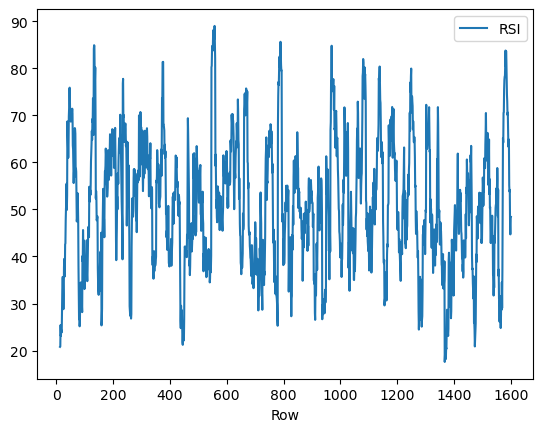

In [63]:
data.plot(x='Row',y='RSI', kind='line')	


In [62]:
data

Row        Open        High         Low       Close  \
Datetime                                                                    
2022-11-01 09:30:00     0  390.140015  390.390015  389.570007  389.859985   
2022-11-01 09:35:00     1  389.869995  390.239990  389.420013  389.890015   
2022-11-01 09:40:00     2  389.880005  390.179993  389.505005  389.730011   
2022-11-01 09:45:00     3  389.730011  389.730011  388.109985  388.429993   
2022-11-01 09:50:00     4  388.410004  388.450012  387.739990  387.989990   
...                   ...         ...         ...         ...         ...   
2022-11-30 15:35:00  1596  406.160004  406.549988  405.529999  405.744995   
2022-11-30 15:40:00  1597  405.730011  405.910004  405.540009  405.779999   
2022-11-30 15:45:00  1598  405.769989  406.089996  405.649994  405.880005   
2022-11-30 15:50:00  1599  405.890015  406.850006  405.880005  406.690002   
2022-11-30 15:55:00  1600  406.690002  407.480011  406.459991  407.470001   

                      Adj Close    Volume    change      gain      loss  \
Datetime                                                                  
2022-11-01 09:30:00  389.859985   3996015       NaN         0         0   
2022-11-01 09:35:00  389.890015   1295495  0.030029  0.030029         0   
2022-11-01 09:40:00  389.730011    941500 -0.160004         0 -0.160004   
2022-11-01 09:45:00  388.429993   2046406 -1.300018         0 -1.300018   
2022-11-01 09:50:00  387.989990   1242718 -0.440002         0 -0.440002   
...                         ...       ...       ...       ...       ...   
2022-11-30 15:35:00  405.744995   2692535 -0.415009         0 -0.415009   
2022-11-30 15:40:00  405.779999   1583128  0.035004  0.035004         0   
2022-11-30 15:45:00  405.880005   3620858  0.100006  0.100006         0   
2022-11-30 15:50:00  406.690002  10726162  0.809998  0.809998         0   
2022-11-30 15:55:00  407.470001  21289117  0.779999  0.779999         0   

                     RSI Gain  RSI Loss  RS Value        RSI  
Datetime                                                      
2022-11-01 09:30:00       NaN       NaN       NaN        NaN  
2022-11-01 09:35:00       NaN       NaN       NaN        NaN  
2022-11-01 09:40:00       NaN       NaN       NaN        NaN  
2022-11-01 09:45:00       NaN       NaN       NaN        NaN  
2022-11-01 09:50:00       NaN       NaN       NaN        NaN  
...                       ...       ...       ...        ...  
2022-11-30 15:35:00  0.406000 -0.343750 -1.181090  54.151369  
2022-11-30 15:40:00  0.372273 -0.424998 -0.875940  46.693399  
2022-11-30 15:45:00  0.349584 -0.432495 -0.808296  44.699310  
2022-11-30 15:50:00  0.385000 -0.415009 -0.927693  48.124510  
2022-11-30 15:55:00  0.389508 -0.415009 -0.938553  48.415137  

[1601 rows x 14 columns]

In [64]:
# Set the number of rows that we want to research
num_row =14

In [65]:
results,results_sign = Preprocessing_data(num_row,raw_results)
data_array=create_2D_array(num_row,results)
y_label=Reassignment(results_sign,num_row)

number of rows of results =  712
Data type =  float64
Number of the Results_sign:  712
[array([-0.75723669,  0.38151222, -0.28114694,  0.53296039,  0.67804865,
       -0.28778816,  0.6877314 , -0.15244585,  0.2259921 ,  0.8318253 ,
        0.31125844, -0.19581948,  0.01207853,  0.1146839 ])]
[array([ 0.38151222, -0.28114694,  0.53296039,  0.67804865, -0.28778816,
        0.6877314 , -0.15244585,  0.2259921 ,  0.8318253 ,  0.31125844,
       -0.19581948,  0.01207853,  0.1146839 , -0.88931167])]
[array([-0.28114694,  0.53296039,  0.67804865, -0.28778816,  0.6877314 ,
       -0.15244585,  0.2259921 ,  0.8318253 ,  0.31125844, -0.19581948,
        0.01207853,  0.1146839 , -0.88931167, -1.60294523])]
[array([ 0.53296039,  0.67804865, -0.28778816,  0.6877314 , -0.15244585,
        0.2259921 ,  0.8318253 ,  0.31125844, -0.19581948,  0.01207853,
        0.1146839 , -0.88931167, -1.60294523,  1.0479168 ])]
[array([ 0.67804865, -0.28778816,  0.6877314 , -0.15244585,  0.2259921 ,
        0.831825